In [387]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation

#models
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#analytics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from matplotlib import pyplot as plt

In [388]:
#função para normalizar os valores no dataset 
from sklearn.preprocessing import StandardScaler
def normalizacoes(df, column):
  X = df.drop(columns=[column])
  Y = df[column]

  scaler = StandardScaler().fit_transform(X)
  X = pd.DataFrame(scaler)
  return X, Y

# Análise do CM1

In [458]:
data = pd.read_csv("https://raw.githubusercontent.com/renatojmf/Machine-Learning/main/data.csv",encoding = "ISO-8859-1")
data["defects"] = data["defects"].astype(int)
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [459]:
#divisão entre dados de treinamento e testes
X = data.drop(['defects'], axis=1)
y = data['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [460]:
k_range = [2,3,4,5,6]
k_scores = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X,y)
  scores = cross_val_score(kmeans, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print(k_scores)

[0.8940408163265307, 0.6904489795918367, 0.722, 0.8181224489795916, 0.8021224489795917]


Text(0, 0.5, 'Cross-Validated Accuracy')

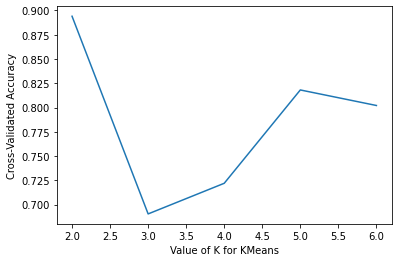

In [461]:
# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KMeans')
plt.ylabel('Cross-Validated Accuracy')

In [462]:
#gerando o subconjunto para defeitos e sem defeitos
fraud = data.loc[data['defects'] == 1]
fraud =  data.drop(columns='defects')

non_fraud = data.loc[data['defects']== 0]
non_fraud = non_fraud.drop(columns='defects')

In [463]:
#gerando as metaclasses para o agrupamento de defeitos
kmeans = KMeans(n_clusters=3, random_state=0)
predict_true = kmeans.fit_predict(non_fraud)
non_fraud['meta_class'] = predict_true

In [464]:
#gerando as metaclasses para o agrupamento sem defeitos
kmeans = KMeans(n_clusters=2, random_state=0)
predict_false = kmeans.fit_predict(fraud)
fraud['meta_class'] = predict_false

In [465]:
#transformando os dados em string para melhor funcionamento dos classificadores
fraud['meta_class'] = fraud['meta_class'].astype(str)
non_fraud['meta_class'] = non_fraud['meta_class'].astype(str)

In [466]:
#concatenando os 2 datasets com as novas meta classes
df_res = pd.concat([fraud, non_fraud])
df_res['meta_class'].unique()

array(['0', '1', '2'], dtype=object)

In [467]:
df_res

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,meta_class
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,0
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,9.0,3.0,1.0,1.0,41.0,170.97,0.07,14.14,12.09,2417.96,0.06,134.33,0,0,1,0,11.0,7.0,23.0,18.0,5.0,0
446,11.0,3.0,1.0,1.0,49.0,215.22,0.07,14.67,14.67,3156.61,0.07,175.37,0,0,1,0,12.0,9.0,27.0,22.0,5.0,0
447,4.0,1.0,1.0,1.0,13.0,39.00,0.33,3.00,13.00,117.00,0.01,6.50,0,0,0,0,4.0,4.0,7.0,6.0,1.0,0
448,3.0,1.0,1.0,1.0,7.0,19.65,0.40,2.50,7.86,49.13,0.01,2.73,0,0,0,0,5.0,2.0,5.0,2.0,1.0,0


In [468]:
import warnings
warnings.filterwarnings("ignore") 

knn_acc = []
nb_acc  = []
nbk_acc = []

X, Y = normalizacoes(data, "defects")

knn = KNeighborsClassifier(n_neighbors=1)
scores_knn = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
knn_acc.append(scores_knn.mean())

print("1NN acc:",knn_acc[0])

nb = GaussianNB()
scores_nb = cross_val_score(nb, X, Y, cv=10, scoring='accuracy')
nb_acc.append(scores_nb.mean())

print("NB sem KMeans acc:",nb_acc[0])

X, Y = normalizacoes(df_res, "meta_class")    
nbm = GaussianNB()
scores_nbm = cross_val_score(nbm, X, Y, cv=10, scoring='accuracy')
nbk_acc.append(scores_nbm.mean())

print("NB com KMeans acc:",nbk_acc[0])

1NN acc: 0.861591836734694
NB sem KMeans acc: 0.8455102040816327
NB com KMeans acc: 0.9230795072788354


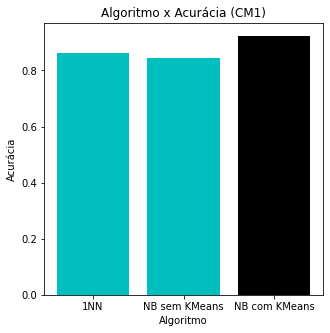

In [469]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.bar("1NN", knn_acc[0]  , color = 'c')
ax.bar("NB sem KMeans", nb_acc[0], color = 'c')
ax.bar("NB com KMeans", nbk_acc[0], color = 'k')
ax.set(xlabel = 'Algoritmo'
       , ylabel = 'Acurácia'
       , title = 'Algoritmo x Acurácia (CM1)')

plt.show()

In [474]:
#mais métricas para o 1NN

X, Y = normalizacoes(data, "defects")
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print(f'TN: {tn}, FP: {fp} , FN:{fn}, TP: {tp}')
print()
print(classification_report(y_test, knn_pred,zero_division=1))

TN: 102, FP: 7 , FN:11, TP: 5

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       109
           1       0.42      0.31      0.36        16

    accuracy                           0.86       125
   macro avg       0.66      0.62      0.64       125
weighted avg       0.84      0.86      0.85       125



In [475]:
#mais métricas para o GaussianNB sem KMeans

X, Y = normalizacoes(data, "defects")
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)

gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, gnb_pred).ravel()
print(f'TN: {tn}, FP: {fp} , FN:{fn}, TP: {tp}')
print()
print(classification_report(y_test, gnb_pred,zero_division=1))

TN: 97, FP: 12 , FN:12, TP: 4

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       109
           1       0.25      0.25      0.25        16

    accuracy                           0.81       125
   macro avg       0.57      0.57      0.57       125
weighted avg       0.81      0.81      0.81       125



In [472]:
#mais métricas para o GaussianNB com KMeans

X, Y = normalizacoes(df_res, "meta_class")
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)

gnb_mod = GaussianNB()
gnb_mod.fit(X_train,y_train)
gnb_mod_pred = gnb_mod.predict(X_test)

print(classification_report(y_test, gnb_mod_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       228
           1       0.29      0.88      0.44         8
           2       0.00      0.00      0.00         1

    accuracy                           0.92       237
   macro avg       0.43      0.60      0.47       237
weighted avg       0.97      0.92      0.94       237



# Análise do KC1

In [476]:
data2 = pd.read_csv("https://raw.githubusercontent.com/renatojmf/Machine-Learning/main/kc1Data.csv",encoding = "ISO-8859-1")
data2["defects"] = data2["defects"].astype(int)
data2.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,0.31,1187.70,65,10,6,0,18.0,25.0,107.0,64.0,21.0,1
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,0.26,635.37,37,2,5,0,16.0,28.0,89.0,52.0,15.0,1
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,0.08,132.33,21,0,2,0,11.0,10.0,41.0,17.0,5.0,1


In [477]:
#divisão entre dados de treinamento e testes
X = data2.drop(['defects'], axis=1)
y = data2['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [478]:
k_range = [2,3,4,5,6]
k_scores = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X,y)
  scores = cross_val_score(kmeans, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print(k_scores)

[0.8516587677725118, 0.8398104265402843, 0.6440735725569848, 0.7819792371925073, 0.5194177386594448]


Text(0, 0.5, 'Cross-Validated Accuracy')

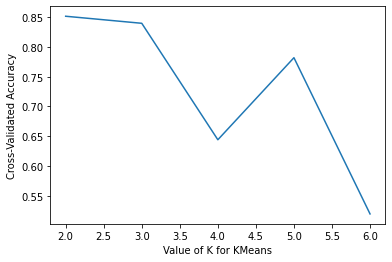

In [479]:
# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KMeans')
plt.ylabel('Cross-Validated Accuracy')

In [480]:
#gerando o subconjunto para defeitos e sem defeitos
fraud = data2.loc[data2['defects'] == 1]
fraud =  data2.drop(columns='defects')

non_fraud = data2.loc[data2['defects']== 0]
non_fraud = non_fraud.drop(columns='defects')

In [481]:
#gerando as metaclasses para o agrupamento de defeitos
kmeans = KMeans(n_clusters=3, random_state=0)
predict_true = kmeans.fit_predict(non_fraud)
non_fraud['meta_class'] = predict_true

In [482]:
#gerando as metaclasses para o agrupamento sem defeitos
kmeans = KMeans(n_clusters=2, random_state=0)
predict_false = kmeans.fit_predict(fraud)
fraud['meta_class'] = predict_false

In [483]:
#transformando os dados em string para melhor funcionamento dos classificadores
fraud['meta_class'] = fraud['meta_class'].astype(str)
non_fraud['meta_class'] = non_fraud['meta_class'].astype(str)

In [484]:
#concatenando os 2 datasets com as novas meta classes
df_res = pd.concat([fraud, non_fraud])
df_res['meta_class'].unique()

array(['0', '1', '2'], dtype=object)

In [485]:
df_res

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,meta_class
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,0
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,0.31,1187.70,65,10,6,0,18.0,25.0,107.0,64.0,21.0,0
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,0.26,635.37,37,2,5,0,16.0,28.0,89.0,52.0,15.0,0
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,0.08,132.33,21,0,2,0,11.0,10.0,41.0,17.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,19.0,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,0.06,66.55,12,1,2,0,10.0,11.0,25.0,15.0,3.0,0
2105,23.0,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,0.09,150.03,18,1,2,0,12.0,13.0,39.0,21.0,5.0,0
2106,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,0.00,0.67,0,0,0,0,3.0,1.0,3.0,1.0,1.0,0
2107,13.0,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,0.02,13.54,6,0,5,0,6.0,6.0,9.0,8.0,1.0,0


In [486]:
import warnings
warnings.filterwarnings("ignore") 

knn_acc = []
nb_acc  = []
nbk_acc = []

X, Y = normalizacoes(data2, "defects")

knn = KNeighborsClassifier(n_neighbors=1)
scores_knn = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
knn_acc.append(scores_knn.mean())

print("1NN acc:",knn_acc[0])

nb = GaussianNB()
scores_nb = cross_val_score(nb, X, Y, cv=10, scoring='accuracy')
nb_acc.append(scores_nb.mean())

print("NB sem KMeans acc:",nb_acc[0])

X, Y = normalizacoes(df_res, "meta_class")    
nbm = GaussianNB()
scores_nbm = cross_val_score(nbm, X, Y, cv=10, scoring='accuracy')
nbk_acc.append(scores_nbm.mean())

print("NB com KMeans acc:",nbk_acc[0])

1NN acc: 0.7691311216429699
NB sem KMeans acc: 0.8227059354547505
NB com KMeans acc: 0.9357906532199591


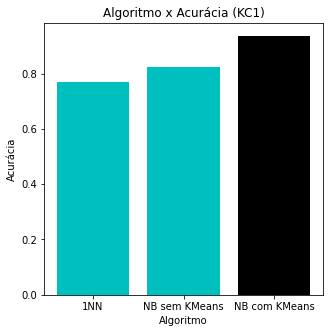

In [491]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.bar("1NN", knn_acc[0]  , color = 'c')
ax.bar("NB sem KMeans", nb_acc[0], color = 'c')
ax.bar("NB com KMeans", nbk_acc[0], color = 'k')
ax.set(xlabel = 'Algoritmo'
       , ylabel = 'Acurácia'
       , title = 'Algoritmo x Acurácia (KC1)')

plt.show()

In [488]:
#mais métricas para o 1NN

X_nn, Y_nn = normalizacoes(data2, "defects")
X_train, X_test2, y_train, y_test = train_test_split(X_nn, Y_nn,random_state=1)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train,y_train)
knn_pred2 = knn2.predict(X_test2)
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred2).ravel()
print(f'TN: {tn}, FP: {fp} , FN:{fn}, TP: {tp}')
print()
print(classification_report(y_test, knn_pred2,zero_division=1))

TN: 403, FP: 48 , FN:44, TP: 33

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       451
           1       0.41      0.43      0.42        77

    accuracy                           0.83       528
   macro avg       0.65      0.66      0.66       528
weighted avg       0.83      0.83      0.83       528



In [489]:
#mais métricas para o GaussianNB sem KMeans

X, Y = normalizacoes(data2, "defects")
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)

gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, gnb_pred).ravel()
print(f'TN: {tn}, FP: {fp} , FN:{fn}, TP: {tp}')
print()
print(classification_report(y_test, gnb_pred,zero_division=1))

TN: 405, FP: 46 , FN:45, TP: 32

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       451
           1       0.41      0.42      0.41        77

    accuracy                           0.83       528
   macro avg       0.66      0.66      0.66       528
weighted avg       0.83      0.83      0.83       528



In [490]:
#mais métricas para o GaussianNB com KMeans

X, Y = normalizacoes(df_res, "meta_class")
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)

gnb_mod = GaussianNB()
gnb_mod.fit(X_train,y_train)
gnb_mod_pred = gnb_mod.predict(X_test)

print(classification_report(y_test, gnb_mod_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       942
           1       0.11      0.24      0.15        17
           2       0.28      0.86      0.42        14

    accuracy                           0.94       973
   macro avg       0.46      0.68      0.52       973
weighted avg       0.97      0.94      0.95       973

